<a href="https://colab.research.google.com/github/dashabhipsa/Machine-Learning-Projects/blob/main/Sentiment_Analysis_on_IMDB_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


Loading Dataset

In [3]:
# Download the dataset from Kaggle
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# Unzip the downloaded dataset
!unzip imdb-dataset-of-50k-movie-reviews.zip

# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')
df.head()


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 86% 22.0M/25.7M [00:00<00:00, 43.9MB/s]
100% 25.7M/25.7M [00:00<00:00, 40.5MB/s]
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Data Preprocessing

In [4]:
# Check for null values
df.isnull().sum()

# Replace sentiment with numerical values: positive -> 1, negative -> 0
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0})

# Split data into features and labels
X = df['review'].values
y = df['sentiment'].values

# Tokenize the reviews
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform input length
X = pad_sequences(X, maxlen=200)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Defining Model

In [5]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training Model

In [6]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 319s 506ms/step - accuracy: 0.7388 - loss: 0.5095 - val_accuracy: 0.8573 - val_loss: 0.3454
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 345s 544ms/step - accuracy: 0.8217 - loss: 0.4069 - val_accuracy: 0.8421 - val_loss: 0.3689
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 350s 493ms/step - accuracy: 0.8460 - loss: 0.3524 - val_accuracy: 0.7147 - val_loss: 0.5268
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 322s 492ms/step - accuracy: 0.8645 - loss: 0.3579 - val_accuracy: 0.8863 - val_loss: 0.2746
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 326s 499ms/step - accuracy: 0.9023 - loss: 0.2490 - val_accuracy: 0.8943 - val_loss: 0.2651


Evaluate the Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 110ms/step - accuracy: 0.8933 - loss: 0.2682
Accuracy: 89.43%


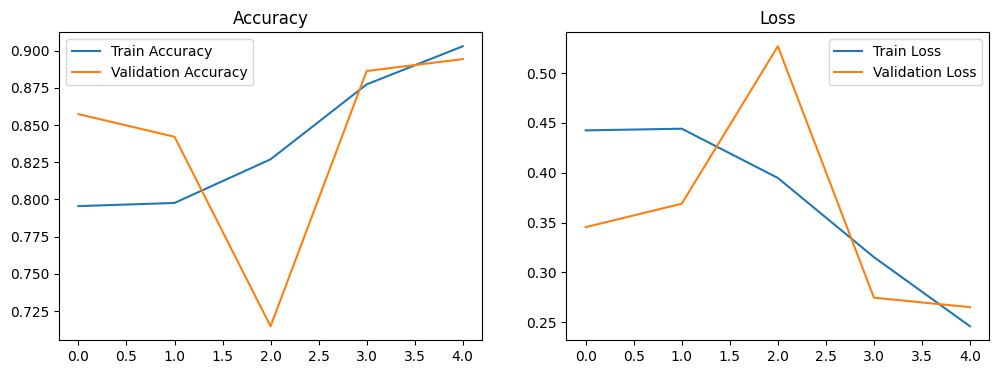

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Accuracy: {accuracy * 100:.2f}%')

loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 110ms/step


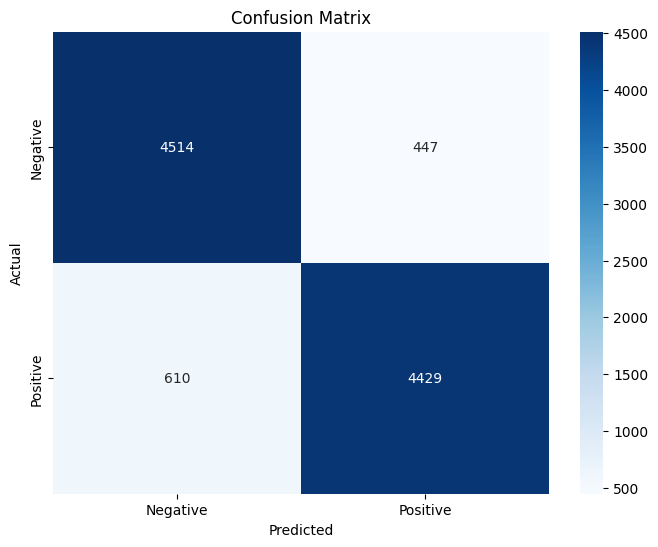

In [8]:
# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Predictive System

In [9]:
def predict_sentiment(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment


In [10]:
# example usage
new_review = "This movie was fantastic. I loved it."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
The sentiment of the review is: positive


In [11]:
# example usage
new_review = "This movie was not that good"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
The sentiment of the review is: negative


In [12]:
# example usage
new_review = "This movie was ok but not that good."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The sentiment of the review is: negative
